In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
columns = ['Res_ID', 'Data_Year', 'C_Type', 'C_Name', 'Opening_Year', 'Population', 'Age_Group', 'Opening_Hours', 'Seating_Capacity', 'Car_Parking', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R', 'Expense', 'Revenue', 'Stock_Price']
data = pd.read_csv('First_Five_Year.csv', header=None, names=columns)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("(Rows, Columns) :",data.shape)
data

(Rows, Columns) : (500, 20)


,Res_ID,Data_Year,C_Type,C_Name,Opening_Year,Population,Age_Group,Opening_Hours,Seating_Capacity,Car_Parking,R1,R2,R3,R4,R5,R6,R,Expense,Revenue,Stock_Price
0,1,2012,AM,Miami,26/06/1971,48447,A,5200,49,Y,4.10,3.98,4.56,3.99,3.60,3.12,3.80,0.399,0.569,320
1,2,2012,AA,Singapore,23/11/1971,78452,A,5298,51,Y,4.89,3.59,3.99,4.59,3.09,3.02,4.00,0.489,0.741,320
2,3,2012,AM,Miami,17/02/1973,43154,A,4359,51,Y,4.31,4.14,4.22,4.52,4.21,4.19,4.41,0.386,0.689,320
3,4,2012,GG,Osaka,16/07/1974,126947,A,5194,17,N,3.05,2.98,3.01,4.40,3.24,3.22,2.03,0.321,0.521,320
4,5,2012,IM,Toronto,09/05/1975,47770,T,5001,45,Y,4.50,3.96,3.50,4.00,3.02,4.00,3.90,0.210,0.352,320
5,6,2012,GG,Paris,06/03/1976,36920,T,3559,16,N,4.25,3.64,2.45,3.04,4.12,3.07,3.54,0.328,0.525,320
6,7,2012,FC,Qingdao,28/01/1976,17800,T,3901,18,N,3.30,2.05,2.80,2.99,3.59,3.46,3.00,0.259,0.289,320
7,8,2012,AA,Hong Kong,20/04/1977,64067,E,4628,37,N,3.67,3.72,3.54,3.76,3.48,3.67,3.59,0.189,0.291,320
8,9,2012,AA,Moscow,26/06/1977,52520,E,4900,31,N,5.00,4.02,4.50,4.00,3.50,3.20,4.50,0.159,0.249,320
9,10,2012,GG,Paris,03/02/1978,35875,A,4020,30,Y,4.20,3.50,4.50,4.20,4.50,3.80,4.00,0.367,0.528,320


In [3]:
scaler = StandardScaler()
data.iloc[:, [5, 7, 8, 10, 11, 12, 13, 14, 15, 16]]=scaler.fit_transform(data.iloc[:, [5, 7, 8, 10, 11, 12, 13, 14, 15, 16]].to_numpy())
data = data.replace({'C_Type':{'GG':1, 'AA':2, 'EG':3, 'FC':4, 'KC':5, 'AM':6, 'IM':7}})
data = data.replace({'C_Name':{'Beijing':1, 'Berlin':2, 'Charlotte':3, 'Chengdu':4, 'Hong Kong':5, 'Istanbul':6, 'London':7, 'Los Angeles':8, 'Mexico City':9, 'Miami':10, 'Moscow':11, 'Mumbai':12, 'New York':13, 'Osaka':14, 'Paris':15, 'Qingdao':16, 'Sacramento':17, 'San Jose':18, 'Seattle':19, 'Seoul':20, 'Shanghai':21, 'Singapore':22, 'Stockholm':23, 'Sydney':24, 'Tokyo':25, 'Toronto':26, 'Zhengzhou':27}})
data = data.replace({'Age_Group':{'T':1, 'A':2, 'E':3}})
data = data.replace({'Car_Parking':{'Y':1, 'N':0}})
data = data.replace({'Car_Parking':{'Y':1, 'N':0}})
data['Opening_Year'] = [datetime.strptime(x, '%d/%m/%Y') for x in data['Opening_Year']]
data['Opening_Year'] = pd.DatetimeIndex(data['Opening_Year']).year
data

,Res_ID,Data_Year,C_Type,C_Name,Opening_Year,Population,Age_Group,Opening_Hours,Seating_Capacity,Car_Parking,R1,R2,R3,R4,R5,R6,R,Expense,Revenue,Stock_Price
0,1,2012,6,10,1971,-0.440196,2,1.310872,1.477841,1,0.609398,0.547289,1.176189,0.159169,-0.321421,-1.033148,0.096551,0.399,0.569,320
1,2,2012,2,22,1971,0.168792,2,1.463054,1.673971,1,1.769737,-0.000703,0.274592,1.070441,-1.239251,-1.205973,0.475926,0.489,0.741,320
2,3,2012,6,10,1973,-0.547623,2,0.004901,1.673971,1,0.917843,0.772106,0.638394,0.964126,0.776377,0.816080,1.253644,0.386,0.689,320
3,4,2012,1,14,1974,1.153056,2,1.301555,-1.660242,0,-0.932824,-0.857817,-1.275523,0.781872,-0.969301,-0.860323,-3.260915,0.321,0.521,320
4,5,2012,7,26,1975,-0.453936,1,1.001849,1.085581,1,1.196912,0.519187,-0.500466,0.174357,-1.365228,0.487712,0.286238,0.210,0.352,320
5,6,2012,1,15,1976,-0.674150,1,-1.237402,-1.758307,0,0.829716,0.069553,-2.161303,-1.283679,0.614406,-1.119560,-0.396636,0.328,0.525,320
6,7,2012,4,16,1976,-1.062213,1,-0.706318,-1.562177,0,-0.565629,-2.164566,-1.607691,-1.359618,-0.339417,-0.445543,-1.420948,0.259,0.289,320
7,8,2012,2,5,1977,-0.123169,3,0.422625,0.301060,0,-0.022179,0.181961,-0.437196,-0.190152,-0.537381,-0.082610,-0.301793,0.189,0.291,320
8,9,2012,2,11,1977,-0.357529,3,0.845008,-0.287331,0,1.931303,0.603493,1.081284,0.174357,-0.501387,-0.894888,1.424362,0.159,0.249,320
9,10,2012,1,15,1978,-0.695359,2,-0.521525,-0.385396,1,0.756277,-0.127162,1.081284,0.478114,1.298280,0.142062,0.475926,0.367,0.528,320


In [4]:
in_rev = data.iloc[:, :-2].values
out_rev = data.iloc[:, 18].values
in_rev_train, in_rev_test, out_rev_train, out_rev_test = train_test_split(in_rev, out_rev, test_size = 0.25, random_state = 32)
model_rev = LinearRegression()
model_rev.fit(in_rev_train, out_rev_train)

out_rev_test_pred = model_rev.predict(in_rev_test)
accuracy_rev = model_rev.score(in_rev_test, out_rev_test)
print('Accuracy:',round(accuracy_rev*100, 2),'%')

Accuracy: 84.85 %


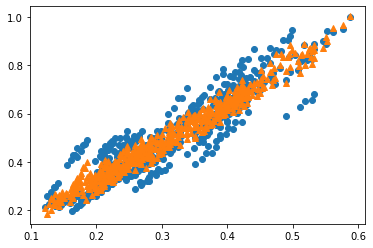

In [5]:
out_rev_pred = model_rev.predict(in_rev)
plt.plot(data['Expense'], data['Revenue'], 'o')
plt.plot(data['Expense'], out_rev_pred, '^')
plt.show()

In [6]:
in_sto = data.iloc[:, [0, 1, 7, 16, 17]].values
out_sto = data.iloc[:, 19].values
in_sto_train, in_sto_test, out_sto_train, out_sto_test = train_test_split(in_sto, out_sto, test_size = 0.25, random_state = 32)
model_sto = LinearRegression()
model_sto.fit(in_sto_train, out_sto_train)

out_sto_test_pred = model_sto.predict(in_sto_test)
accuracy_sto = model_sto.score(in_sto_test, out_sto_test)
print('Accuracy:',round(accuracy_sto*100, 2),'%')

Accuracy: 85.51 %


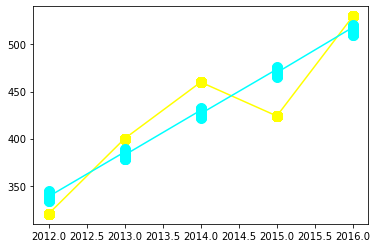

In [7]:
out_sto_pred = model_sto.predict(in_sto)
plt.plot(data['Data_Year'], data['Stock_Price'], color = 'yellow', linestyle = 'solid', marker = 'o', markerfacecolor = 'yellow', markersize = 10)
plt.plot(data['Data_Year'], out_sto_pred, color = 'cyan', linestyle = 'solid', marker = 'o', markerfacecolor = 'cyan', markersize = 10)
plt.show()

In [8]:
sum_expense = sum(data['Expense'])
sum_revenue = sum(data['Revenue'])
sum_pred_revenue = sum(out_rev_pred)
print(sum_expense,'\n')
print(sum_revenue,'\n')
print(sum_pred_revenue,'\n')
error  = abs(sum_revenue - sum_pred_revenue)/sum_pred_revenue
print('Error:',round(error*100, 2),'%')

156.4340000000001 

253.2289999999999 

253.40414013529292 

Error: 0.07 %


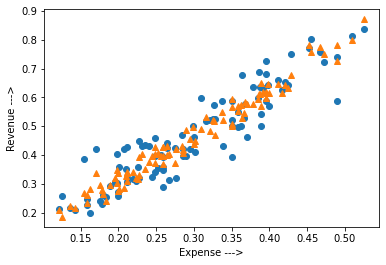

Year: 2012
Net expense: 29.73700000000001
Net revenue Actual: 46.384000000000015
Net predicted revenue: 46.503274495198
Net Error: 0.26 %
Actual Stock Price: 320
Predicted Stock Price: 338.89416716835535


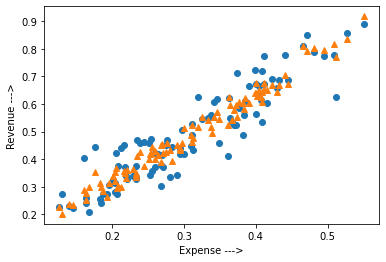

Year: 2013
Net expense: 30.822000000000003
Net revenue Actual: 48.938
Net predicted revenue: 49.08248906456747
Net Error: 0.29 %
Actual Stock Price: 400
Predicted Stock Price: 383.032939981432


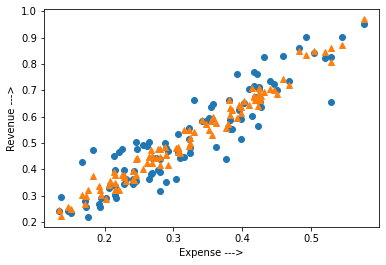

Year: 2014
Net expense: 32.116
Net revenue Actual: 51.963000000000015
Net predicted revenue: 51.99224701000526
Net Error: 0.06 %
Actual Stock Price: 500
Predicted Stock Price: 427.2060167138981


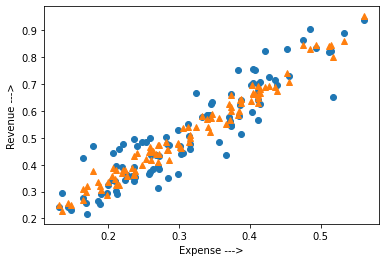

Year: 2015
Net expense: 31.296999999999993
Net revenue Actual: 51.53600000000001
Net predicted revenue: 51.56019560791968
Net Error: 0.05 %
Actual Stock Price: 424
Predicted Stock Price: 471.0322791799816


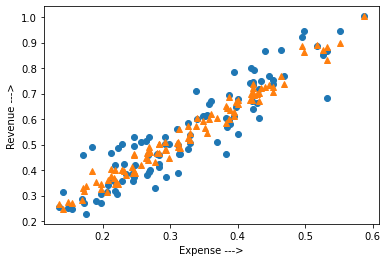

Year: 2016
Net expense: 32.46199999999998
Net revenue Actual: 54.408000000000015
Net predicted revenue: 54.265933957602385
Net Error: 0.26 %
Actual Stock Price: 530
Predicted Stock Price: 515.1841826799069


In [9]:
year = []
population = []
openinghrs = []
net_exp = []
net_rev = []
net_rev_pred = []
stock_actual = []
stock_pred = []
for i in range(1, 6):
    file = 'Year'+str(i)+'.csv'
    yearly = pd.read_csv(file, header=None, names=columns)
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    
    yearly.iloc[:, [5, 7, 8, 10, 11, 12, 13, 14, 15, 16]]=scaler.fit_transform(yearly.iloc[:, [5, 7, 8, 10, 11, 12, 13, 14, 15, 16]].to_numpy())
    yearly = yearly.replace({'C_Type':{'GG':1, 'AA':2, 'EG':3, 'FC':4, 'KC':5, 'AM':6, 'IM':7}})
    yearly = yearly.replace({'C_Name':{'Beijing':1, 'Berlin':2, 'Charlotte':3, 'Chengdu':4, 'Hong Kong':5, 'Istanbul':6, 'London':7, 'Los Angeles':8, 'Mexico City':9, 'Miami':10, 'Moscow':11, 'Mumbai':12, 'New York':13, 'Osaka':14, 'Paris':15, 'Qingdao':16, 'Sacramento':17, 'San Jose':18, 'Seattle':19, 'Seoul':20, 'Shanghai':21, 'Singapore':22, 'Stockholm':23, 'Sydney':24, 'Tokyo':25, 'Toronto':26, 'Zhengzhou':27}})
    yearly = yearly.replace({'Age_Group':{'T':1, 'A':2, 'E':3}})
    yearly = yearly.replace({'Car_Parking':{'Y':1, 'N':0}})
    yearly = yearly.replace({'Car_Parking':{'Y':1, 'N':0}})
    yearly['Opening_Year'] = [datetime.strptime(x, '%d/%m/%Y') for x in yearly['Opening_Year']]
    yearly['Opening_Year'] = pd.DatetimeIndex(yearly['Opening_Year']).year
    
    rev_x = yearly.iloc[:, :-2].values
    rev_y = yearly.iloc[:, 18].values
    
    stock_x = yearly.iloc[:, [0, 1, 7, 16, 17]].values
    stock_y = data.iloc[:, 19].values
    
    out_pred = model_rev.predict(rev_x)
    plt.plot(yearly['Expense'], yearly['Revenue'], 'o')
    plt.plot(yearly['Expense'], out_pred, '^')
    plt.xlabel("Expense --->")
    plt.ylabel("Revenue --->")
    
    out_stock_pred = model_sto.predict(stock_x)
    
    sum_expense = sum(yearly['Expense'])
    sum_revenue = sum(yearly['Revenue'])
    sum_pred_revenue = sum(out_pred)
    
    error  = abs(sum_revenue - sum_pred_revenue)/sum_pred_revenue
    
    year.append(yearly['Data_Year'][1])
    net_exp.append(sum_expense)
    net_rev.append(sum_revenue)
    net_rev_pred.append(sum_pred_revenue)
    population.append(sum(yearly['Population']))
    openinghrs.append(sum(yearly['Opening_Hours']))
    stock_actual.append(yearly['Stock_Price'][1])
    stock_pred.append(sum(out_stock_pred)/100)
    
    plt.show()
    print('Year:',yearly['Data_Year'][1])
    print('Net expense:',sum_expense)
    print('Net revenue Actual:',sum_revenue)
    print('Net predicted revenue:',sum_pred_revenue)
    print('Net Error:',round(error*100, 2),'%')
    print('Actual Stock Price:',stock_actual[i-1])
    print('Predicted Stock Price:',stock_pred[i-1])

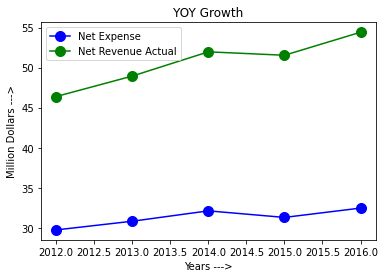

In [10]:
plt.plot(year, net_exp, color = 'blue', linestyle = 'solid', marker = 'o', markerfacecolor = 'blue', markersize = 10, label = 'Net Expense')
plt.plot(year, net_rev, color = 'green', linestyle = 'solid', marker = 'o', markerfacecolor = 'green', markersize = 10, label = 'Net Revenue Actual')
plt.title("YOY Growth")
plt.xlabel("Years --->")
plt.ylabel("Million Dollars --->")
plt.legend()
plt.show()

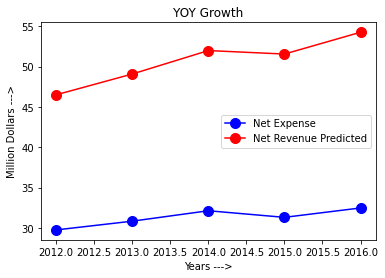

In [11]:
plt.plot(year, net_exp, color = 'blue', linestyle = 'solid', marker = 'o', markerfacecolor = 'blue', markersize = 10, label = 'Net Expense')
plt.plot(year, net_rev_pred, color = 'red', linestyle = 'solid', marker = 'o', markerfacecolor = 'red', markersize = 10, label = 'Net Revenue Predicted')
plt.title("YOY Growth")
plt.xlabel("Years --->")
plt.ylabel("Million Dollars --->")
plt.legend()
plt.show()

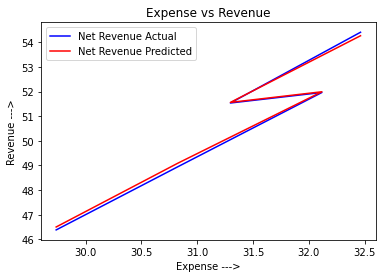

In [12]:
plt.plot(net_exp, net_rev, color = 'blue', label = 'Net Revenue Actual')
plt.plot(net_exp, net_rev_pred, color = 'red', label = 'Net Revenue Predicted')
plt.title("Expense vs Revenue")
plt.xlabel("Expense --->")
plt.ylabel("Revenue --->")
plt.legend()
plt.show()

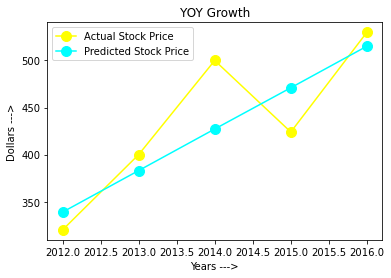

In [13]:
plt.plot(year, stock_actual, color = 'yellow', linestyle = 'solid', marker = 'o', markerfacecolor = 'yellow', markersize = 10, label = 'Actual Stock Price')
plt.plot(year, stock_pred, color = 'cyan', linestyle = 'solid', marker = 'o', markerfacecolor = 'cyan', markersize = 10, label = 'Predicted Stock Price')
plt.title("YOY Growth")
plt.xlabel("Years --->")
plt.ylabel("Dollars --->")
plt.legend()
plt.show()